In [544]:
"""from sklearn.utils import shuffle #We are using shuffle for getting numbers randomly.
import pandas

#We are using pandas for opening the dataset.csv file. Basically, this code reads the file.
dataFile = pandas.read_csv("dataset.csv")
dataFile = shuffle(dataFile)
dataFile"""

'from sklearn.utils import shuffle #We are using shuffle for getting numbers randomly.\nimport pandas\n\n#We are using pandas for opening the dataset.csv file. Basically, this code reads the file.\ndataFile = pandas.read_csv("dataset.csv")\ndataFile = shuffle(dataFile)\ndataFile'

In [545]:
#SVC Support Vector Classifier for fitting model.
#Joblib for saving model that we fit.

#Now, I will seperate dependent and independent variable.
"""X = dataFile.drop(["Label"], axis = 1) #which means I am transferring all data, which includes pixels,into the X axis. 
                                #axis equals 1 means that I seperate vertically. If I want to seperate horizentally,
                                #I have to match the axis to 0. General purpose is to assign pixels into the X variable in dataFile.
Y = dataFile["Label"]           #Therefore, I will seperate dpendent and independent variable. Numbers of [1,2,3,4,5,6,7,8,9,0]
                            #are assigned to the Y variable."""

'X = dataFile.drop(["Label"], axis = 1) #which means I am transferring all data, which includes pixels,into the X axis. \n                                #axis equals 1 means that I seperate vertically. If I want to seperate horizentally,\n                                #I have to match the axis to 0. General purpose is to assign pixels into the X variable in dataFile.\nY = dataFile["Label"]           #Therefore, I will seperate dpendent and independent variable. Numbers of [1,2,3,4,5,6,7,8,9,0]\n                            #are assigned to the Y variable.'

In [546]:
#Now, I will try one of the images, that are located in a dataFile, to test whether it looks true or not.
#For this operation, I am using matplotlib for image visualization.
"""
import matplotlib.pyplot as plt
import cv2 #I am using cv2 of openCV to 
"""

"""
Aşağıdaki kodu uyarladığımızda, teker teker dosyaları kaydetmektedir ancak output olarak kaydettiğinde problem yaşıyoruz.
Küçük küçük görüntü olarak kaydettiği için problem yaşıyoruz. Dolayısıyla, görüntü almak için işlemi kısaltıyoruz.

for index in range(2,4):
    image = X.loc[index].values.reshape(28,28)
    label = Y[index]
    filename = f"image_{index+1}_label_{label}.png"
    plt.imsave(filename, image)""" 


"""
index = 489#114 is located at the end of the dataFile. So, I am using that value for testing. If I want, I can use another variable.
image = X.loc[index].values.reshape(28,28) #Main reason is to reshape an array which is in index of 114 at the size of 28*28.
                                            #Why 28*28? Because, when I was defining the size of an image at the begining
                                            #of the code, I determined as 28*28 and I formed the datasetFile according to this size.
                                            #Therefore, I am using 28*28.
                                            #Basically, as I am getting a row of 114, I am reshaping that row into  the pixels.
"""
#Finally, I am using only X values so that pixels are located in X values because Y values include label [0,1,2,3,4,5,6,7,8,9].
#Let me see that whether It will give label or not, as using X values (data - 0 or 1's).
#I have to print my image (label - Y value) with that index because those are in array list.
#I am reaching that value as indicating its index.
"""
print("Index of {} shows {}.".format(index,Y[index])) #114 is label of 2. It has to give 2.
plt.imshow(image) #Using imshow method from matplotlib module, it will shows the output of the image with pixels."""

'\nprint("Index of {} shows {}.".format(index,Y[index])) #114 is label of 2. It has to give 2.\nplt.imshow(image) #Using imshow method from matplotlib module, it will shows the output of the image with pixels.'

In [20]:
import cv2
import glob
import csv 

In [21]:
headerText = ["Label"]

for index in range(1, 28*28+1): #In this loop, we are defining the pixel rows which started with 1 until 785.
    headerText.append("pixel {}".format(str(index)))
    
#datasetFile = open("dataset.csv" , "a")
#with datasetFile:

with open("datasetEditTwo.csv", "a") as datasetFile: #dataset adında bir dosya oluşturuyorum ve dosyaya ekleme yapabilmek için
                                    #append yani "a" modunda açıyorum. Append modunda açtığım dataset.csv dosyasını datasetFile
                                    #parametresine gönderiyorum.
    writer = csv.writer(datasetFile)       #.csv dosyasına yazabilmek için writer objesi tanımlıyorum. 
    writer.writerow(headerText) #writer objesiyle birlikte, dataset dosyası içerisindeki ilk satıra, 785.pixele kadar
                                #headerText listesi içerisindeki stringleri ekliyorum.
    #Şu anda dataset içerisine title alanlarını oluşturduk ancak şimdi ise title alanları içerisine verileri eklememiz gerek.

#Totalde 0 dan 10 a kadar 10 adet dosyamız olduğu için for döngüsü oluşturucam ve her bir dosya içerisine teker teker giricem.
for numberOfImage in range(0,10):
    fileContainImages = glob.glob("collactedImagesEdit/imagesOf{}/*.png".format(str(numberOfImage))) #Dosya yolu üzerindeki 10 adet dosya içerisindeki görselleri çıkarmak ve dosyalara ulaşmak
                                #için glob komutunu kullanıyoruz.
    
    #fileContainImage değeri içerisine yolladığımız png dosyalarını okumak için for döngüsü oluşturmamız gerekecektir.
    for imageDirectoryPath in fileContainImages:
        im = cv2.imread(imageDirectoryPath) #openCV kütüphanesini kullanarak, görselin bulunduğu konuma gidip, görseli okuyoruz.
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #Bi üstteki kodda okuduğum imageları grayscale a dönüştürmem gerekiyor.
                                                        #Bunun için yine pythonun hazır kütüphanesi olan openCV kullanıyorum.
                                                    #Normalde benim imagelerimde RGB renkleri yani kırmızı yeşil ve mavi
                                                    #renkleri bulunuyor. Dolayısıyla kompleks yapıya sahip olan 3 kanalı,
                                                    #1 kanala sahip olan grayscale e dönüştürüyorum.
        
        #Grayscale e dönüştürdüğüm imagelerimdeki pürüzsüzlüğü arttırmaya çalıştığım için imageleri bulanıklaştırıyorum.
        im_gray_two = cv2.GaussianBlur(im_gray, (15,15), 0) #Bunun için de openCV kütüphanesinden yararlanıyorum.
        #GaussianBlur metoduyla resmi bulanıklaştırıyorum. İlk olarak pürüzsüzlüğü arttıracak imagei yani im_grayi parametre 
        #olarak alır. İkinci olarak, kernel boyutunu ve üçüncü olarak ise 0 alır. 0, resmi bulanıklaştırmak için gerekli olan
        #x ve y değerlerini otomatik olarak belirler ve bizim hesaplamamıza gerek kalmaz.
        
        #Son olarak, grayscale e çevirdiğimiz imageleri yeniden sizelandırıp bir değişken içerisine atıyoruz. Bunu yaparken
        #parametre olarak grayscale çevrilen image yani im_grayi, yapılandırmak istediğim boyutu alır.
        #Aldığı son parametre ise interpolasyondur. Resim içerisinde pixel sayısını arttırdığımız için resmin dezonformasyona
        #uğramasını istemediğimiz için openCV kütüphanesiyle birlikte,0 a eşitliyoruz.
        
        #Yeniden boyutlandırmak istediğim imagei, roi (region of interest) içerisine kaydediyorum. Dolayısıyla bu sayede sadece ilgi alanımızın
        #olduğu bölgeye  ulaşıyoruz. İlgi alanımız olarak belirttiğimiz bölge ise sayının konumudur.  
        
        roi = cv2.resize(im_gray_two, (28,28), interpolation = cv2.INTER_AREA) #resize image = first size image
        
        eachElementInDataset = list()
        eachElementInDataset.append(numberOfImage)
        
        #Our images have size which menas all of them has pixels. Therefore, we have to store rows and columns in datasets.
        rows, columns = roi.shape #we are defining total numbers of rows and columns which are obtained from  resized image.  
        
        #Ardından veri listesi içerisine verilerimizi manuel olarak giriyoruz çünkü satır ve sütunlarımızı belirledik.
        for i in range(rows):
            for j in range(columns):
                
                kThElement = roi[i,j]
                
                if (kThElement > 100): #which means we are determining the area of numbers in an image
                    kThElement = 1
                elif (kThElement < 100): #area of  points which are not in the numbers' area.
                    kThElement = 0
                
                eachElementInDataset.append(kThElement) #appending kth value which I found in  previous to the data in dataset.
        
        datasetFile = open("datasetEditTwo.csv" , "a")
        with datasetFile: #Yine dosyamı açıyorum ve dosya içerisinde bu sefer satırlara title değil direk listeyi ekliyorum
                            #ve bu liste içerisinde 0 lar ve 1 ler bulunmaktadır. Her bir satır 1 ler ve 0 lar ile dolduruyoruz.
            writer = csv.writer(datasetFile)
            writer.writerow(eachElementInDataset)

In [22]:
from sklearn.utils import shuffle #We are using shuffle for getting numbers randomly.
import pandas

#We are using pandas for opening the dataset.csv file. Basically, this code reads the file.
dataFile = pandas.read_csv("datasetEditTwo.csv")
dataFile = shuffle(dataFile)
dataFile

,Label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
173,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#SVC Support Vector Classifier for fitting model.
#Joblib for saving model that we fit.

#Now, I will seperate dependent and independent variable.
X = dataFile.drop(["Label"], axis = 1) #which means I am transferring all data, which includes pixels,into the X axis. 
                                #axis equals 1 means that I seperate vertically. If I want to seperate horizentally,
                                #I have to match the axis to 0. General purpose is to assign pixels into the X variable in dataFile.
Y = dataFile["Label"]           #Therefore, I will seperate dpendent and independent variable. Numbers of [1,2,3,4,5,6,7,8,9,0]
                            #are assigned to the Y variable.

Index of 330 shows 9.


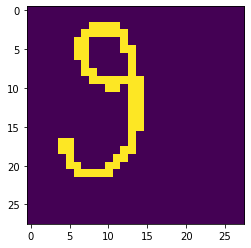

In [24]:
#Now, I will try one of the images, that are located in a dataFile, to test whether it looks true or not.
#For this operation, I am using matplotlib for image visualization.

import matplotlib.pyplot as plt
import cv2 #I am using cv2 of openCV to 

index = 330 #114 is located at the end of the dataFile. So, I am using that value for testing. If I want, I can use another variable.
image = X.loc[index].values.reshape(28,28) #Main reason is to reshape an array which is in index of 114 at the size of 28*28.
                                            #Why 28*28? Because, when I was defining the size of an image at the begining
                                            #of the code, I determined as 28*28 and I formed the datasetFile according to this size.
                                            #Therefore, I am using 28*28.
                                            #Basically, as I am getting a row of 114, I am reshaping that row into  the pixels.

#Finally, I am using only X values so that pixels are located in X values because Y values include label [0,1,2,3,4,5,6,7,8,9].
#Let me see that whether It will give label or not, as using X values (data - 0 or 1's).
#I have to print my image (label - Y value) with that index because those are in array list.
#I am reaching that value as indicating its index.

print("Index of {} shows {}.".format(index,Y[index])) #114 is label of 2. It has to give 2.
plt.imshow(image) #Using imshow method from matplotlib module, it will shows the output of the image with pixels. 

In [551]:
#Now, I want to print out X and Y (dependent and independent variables) before train and test sets.

print(X)
print("------------------")
print(Y)

     pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  pixel 7  pixel 8  \
55         0        0        0        0        0        0        0        0   
53         0        0        0        0        0        0        0        0   
25         0        0        0        0        0        0        0        0   
246        0        0        0        0        0        0        0        0   
139        0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
308        0        0        0        0        0        0        0        0   
88         0        0        0        0        0        0        0        0   
31         0        0        0        0        0        0        0        0   
176        0        0        0        0        0        0        0        0   
291        0        0        0        0        0        0        0        0   

     pixel 9  pixel 10  ...  pixel 775  pixel 776  

In [25]:
#Now, I want to split images train and test sets. Generally, I am splitting into these sets about 80% train and 20% test set.
#Train and Test Sets Step.
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2) #train_size = 0.8 == test_size = 0.2 
                                    #X and Y are dependent and independent variables.
                                    #Test_size means that the ratio of the test set is 20% and reamining of the data equals train
                                    #Some images are used for training purpose, some of the images are used for testing purpose.
#I am using train images for creating my model. However, I am using testing images for calculating accuracy of the model.
#So, I am aiming for training or teaching the model in train part. I mean that I am giving the pixel value and its label. 
#So I am matching the values. (This pixel equal this label)

In [553]:
print("Data for training and testing part:\n ")
print("-->Training part: {}\n------------------------------------\n-->Testing part: {}".format(train_y, test_y))

Data for training and testing part:
 
-->Training part: 157    4
249    7
175    5
328    9
220    6
      ..
85     2
312    9
100    3
84     2
299    8
Name: Label, Length: 268, dtype: int64
------------------------------------
-->Testing part: 330    9
124    3
290    8
22     0
214    6
      ..
79     2
142    4
183    5
63     1
282    8
Name: Label, Length: 67, dtype: int64


In [554]:
print("Train x: {}\n----------------\nTest x: {}\n----------------------\nTrain y: {}\n-------------\nTest y: {}\n-------".format(train_x,test_x,train_y,test_y))

Train x:      pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  pixel 7  pixel 8  \
157        0        0        0        0        0        0        0        0   
249        0        0        0        0        0        0        0        0   
175        0        0        0        0        0        0        0        0   
328        0        0        0        0        0        0        0        0   
220        0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
85         0        0        0        0        0        0        0        0   
312        0        0        0        0        0        0        0        0   
100        0        0        0        0        0        0        0        0   
84         0        0        0        0        0        0        0        0   
299        0        0        0        0        0        0        0        0   

     pixel 9  pixel 10  ...  pixel 775  pi

In [26]:
import joblib #for saving the model

from sklearn import metrics #To calculate accuracy of our models.
#from sklearn.metrics import classification_report 
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

#First of all, I will fit a model with using SVC model and then, I will fit a model with using KNN.
#from sklearn.neighbors import KNeighborsClassifier #using Kth Nearest Neighbour for creating our model with the help of training data.
from sklearn.svm import SVC #using Support Vector Classifier for creating our model with the help of training data.

#For SVC and KNN Model forming:
classForSvcModel = SVC(kernel = "linear", random_state = 6)
#classForKnnModel = KNeighborsClassifier(n_neighbors=5)

#According to the results, I load the model to  the folder.
#joblib.dump(classForSvcModel, "SVCmodel/digitRecognizer")

#Fitting models with the help of our training sets:
classForSvcModel.fit(train_x, train_y)
#classForKnnModel.fit(train_x, train_y)

#Loading models into the folders:
joblib.dump(classForSvcModel, "supportVectorClassifierModelTwo/digitRecognizerEditTwo")
#joblib.dump(classForKnnModel, "KNNmodel/digitRecognizerKnn")

['supportVectorClassifierModelTwo/digitRecognizerEditTwo']

In [27]:
#Testing our models with the help of test x set. According to the test x, our models will try to predict number.
svcPrediction = classForSvcModel.predict(test_x)
#knnPrediction = classForKnnModel.predict(test_y)

#Printing out the models accuracy scores using metrics.
print("Accuracy score of the edited two SVC model: {}".format(metrics.accuracy_score(svcPrediction, test_y)))

Accuracy score of the edited two SVC model: 0.7164179104477612


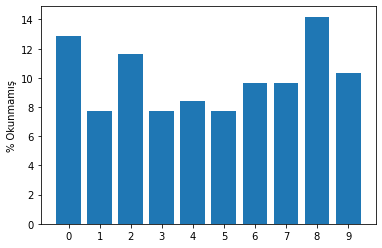

In [557]:
import matplotlib.pyplot as plt

# Verileri liste olarak tanımlayalım
data = [12.9, 7.74, 11.61, 7.74, 8.39, 7.74, 9.68, 9.68, 14.19, 10.32]

# Grafiği çizdirelim
plt.bar(range(len(data)), data)

# X ekseni etiketlerini ayarlayalım
plt.xticks(range(len(data)), range(len(data)))

# Y ekseni etiketlerini ayarlayalım
plt.ylabel('% Okunmamış')

# Grafiği gösterelim
plt.show()

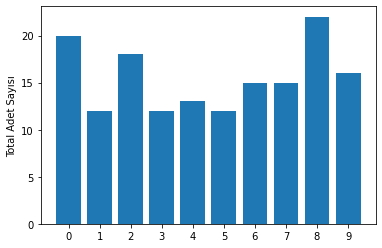

In [558]:
import matplotlib.pyplot as plt

# Verileri liste olarak tanımlayalım
data = [20,12,18,12,13,12,15,15,22,16]

# Grafiği çizdirelim
plt.bar(range(len(data)), data)

# X ekseni etiketlerini ayarlayalım
plt.xticks(range(len(data)), range(len(data)))

# Y ekseni etiketlerini ayarlayalım
plt.ylabel('Total Adet Sayısı')

# Grafiği gösterelim
plt.show()

In [563]:
import joblib #loading model to the system.
import cv2 #doing operations on images.
import numpy as np
import time #for live predicting.
import pyscreenshot as ImageGrab #taking screenshot of the image that is drawn in paint.

ourModel = joblib.load("supportVectorClassifierModel/digitRecognizerEdit") #Loading our SVC model which is loacated in SVCmodel into the system. 
predictedImages = "Predicted Images/" #When we are predicting images live, those images will be collected in Predicted Images.

while True: #Since most of the code will be repeated, We are using infinite loop. At the bottom  of the loop, I will use 
            #an if condition to break loop.
    
    #At the same time, This part of the project includes same operation with the part of generating dataset.
    #We did operations as following:
    #converting grayscale operations for decreasing comlexity of the image, increasing smoothness, and resizing images. 
    
    imageCaptured = ImageGrab.grab(bbox=(175,340,800,900)) #We are determining the size of the image that will be captured.
                                        #At the same time, sizes must  be the same with in the first  progress report.
                                        #When collacting images from paint, We used 175,340,800,900 size.
    imageCaptured.save(predictedImages + "predictedImage.png") #We are saving the image ina a predicted images file.  
    im = cv2.imread(predictedImages + "predictedImage.png") #Then I have to read my image that I saved a line above. "imageSaved"
    
    #We captured images at the beginning of the while loop, saved that image in predicted images file, and read it.
    #Now, we have to convert that image into grayscale. We will use opencv that purpose
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #I have to convert "im" into grayscale format with the help of cvtColor method.
    im_gray = cv2.GaussianBlur(im_gray, (15,15), 0) #I have to increase smoothness of the image so that I have to blur images.
                                                    #First parameter is a value that is blurred, second parameter is kernel size
                                                    #Third parameter is 0 for sigma x, and sigma y values that are needed for 
                                                    #blurring images. Those are calculated otomatically.
    
    #We did capturing, saving and reasing images, converting them into grayscale, and blurring operations above. 
    #Now, we will do threshold operations for keep going on particular region that includes only an object  of image.
    
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY) #im_gray value is assigned to the first parameter for
                                                                    #thresholding operation. We assign the numbers between 
                                                                    #100 and 255. At last parameter, we are doing threshold.
    
    roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA) #I have assigned an image  that is thresholded and resized
                                                                    #with 28*28.
    
    #After assigning thresholded and resized image to roi which means that we are interesting only with particular region,
    #now we will do append operation. We will shape roi with rows and columns.
    
    rows, columns = roi.shape #Rows define indexes that are amount of total number of images which means 490 rows.
                            #Columns define pixel numbers of the numbers that are amount of multiplication of size: 28*28 = 784.
    
    rowsColsList = list() #We will append pixels of the image. These pixels are in binary format (0,1). 
    #If thresholded and resized image includes particular region, k  is assigned to 1. (means that k > 100).
    #If thresholded and resized image does not include particular region, k is assigned to 0. (means that k <100).
    #Now, we will do nested loops. We will look at the each columns in each rows.
    
    for index in range(rows):
        for pixelNumber in range(columns):
            k = roi[index, pixelNumber]
            if k > 100:
                k = 1
            else:
                k = 0
            #After assigning k values, append them in rowsColsList.
            rowsColsList.append(k)

    #The dataset of the thresholded and resized image is ready. Now, we will predict images.
    predictionValues = ourModel.predict([rowsColsList])
    print("Your prediction is: {}".format(str(predictionValues[0]))) #The number is located in 0 th  index.
    
    #We will show how drawn images and images collacted in paint are matched and their accuracy. Therefore, we will open new window.
    cv2.putText(im, "Prediction in paint: {}".format(str(predictionValues[0])), (20,20), 0, 0.8, (0,255,0), 2, cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Live Prediction Page: ")
    cv2.imshow("Live Prediction Page", im)
    cv2.waitKey(10000)
    
    if (cv2.waitKey(1) == 13):
        break
    

cv2.destroyAllWindows()

Your prediction is: 0
Your prediction is: 1
Your prediction is: 2
Your prediction is: 3
Your prediction is: 4
Your prediction is: 5
Your prediction is: 6
Your prediction is: 7
Your prediction is: 7
Your prediction is: 3
Your prediction is: 9
Your prediction is: 1
Your prediction is: 3
Your prediction is: 5
Your prediction is: 3
Your prediction is: 8
Your prediction is: 8
Your prediction is: 8
Your prediction is: 8
Your prediction is: 8
Your prediction is: 8


KeyboardInterrupt: 